In [47]:
import pde
import numpy as np

In [62]:
L = 1
num_points = 20
E = 10
alpha = 1
grid = pde.CartesianGrid([[0, L]], [num_points])

# The equation i wish to simulate is
$ E \frac{\partial^2 u}{\partial x^2} + \frac{\partial \sigma}{\partial x} = \alpha \frac{\partial u}{\partial t} $

In [63]:
eq = pde.PDE(
    rhs={"u": f"{E/alpha} * laplace(u) + {1/alpha} * gradient(sigma)", "sigma": "0"},
    bc_ops={
        "u:*": ({"value": 0}, {"derivative": -0.047}),
        "sigma:*": ({"value": 0}, {"value": 10}),
    },
)

In [64]:
eq.bcs

{'u:*': ({'value': 0}, {'derivative': -0.047}),
 'sigma:*': ({'value': 0}, {'value': 10}),
 '*:*': 'natural'}

In [65]:
u_field = pde.ScalarField(grid, 0.0, label="$u$")
sig_field = pde.ScalarField(grid, np.linspace(0, 10, num_points), label="$\sigma$")

In [66]:
state = pde.FieldCollection([u_field, sig_field])
# tracker = pde.PlotTracker(interval=1,)
sol = eq.solve(
    state,
    t_range=10,
    dt=1e-3,
)  # tracker=tracker)

  0%|          | 0/10.0 [00:00<?, ?it/s]

Simulation aborted at t=3.1189999999999998 (Field was not finite)


In [67]:
sol[0]

ScalarField(grid=CartesianGrid(bounds=((0.0, 1.0),), shape=(20,), periodic=[False]), data=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan], label="$u$")

In [55]:
sol[0].interpolate(-0.01)

array(0.25501476)

In [56]:
u_grad = np.gradient(sol.fields[0].data, edge_order=2)

In [57]:
u_grad[-1] * 2

-0.0049409484395397385

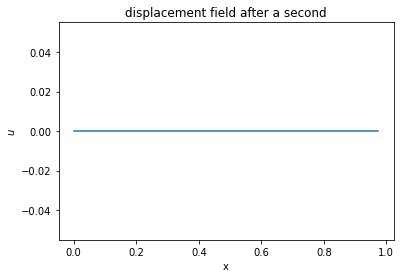

In [58]:
u_field.plot(title="displacement field after a second")

In [59]:
state.fields.

SyntaxError: invalid syntax (4291986749.py, line 1)

In [60]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([64, 64])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
tracker = PlotTracker(interval=1, plot_args={"vmin": 0, "vmax": 5})
sol = eq.solve(state, t_range=20, dt=1e-3, tracker=tracker)

Output()

Spent more time on handling trackers (31.162654000000202) than on the actual simulation (21.336659999999824)
